In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from afinn import Afinn
from nrclex import NRCLex

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Konrad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
theme = 'WorldCup'

In [4]:
tweets = pd.read_csv(f'./data/{theme}/tweets_clean.csv', converters={'text_clean_list': pd.eval, 'text_clean_stopwords': pd.eval, 'hashtags_list': pd.eval})
users = pd.read_csv(f'./data/{theme}/users_clean.csv')

In [13]:
afinn = Afinn()
tweets['afinn'] = tweets.text.apply(lambda row : afinn.score(row))

In [5]:
def get_emotions(text):
    text_object = NRCLex(text)
    return text_object.raw_emotion_scores

In [6]:
tweets['emotions'] = tweets.text_clean.apply(get_emotions)

In [14]:
tweets

,hashtag,id,author_id,text,like_count,reply_count,retweet_count,quote_count,created_at,lang,mentions,text_clean,text_clean_list,text_clean_stopwords,hashtags_list,emotions,afinn
0,#Qatar2022,1592601191761838081,1591065849531604994,Massage and sex in Qatar❤️\nMassage body to bo...,0,0,0,0,2022-11-15 19:31:27+00:00,en,NaN,massage and sex in qatar massage body to bod...,"[massage, and, sex, in, qatar, massage, body, ...","[massage, sex, qatar, massage, body, body, qat...","[qatar, qatar2022]","{'joy': 3, 'positive': 3, 'anticipation': 1, '...",0.0
1,#Qatar2022,1592601156412649477,968203797049769984,How to identify a whitexican in Qatar 2022 #Q...,0,1,0,0,2022-11-15 19:31:19+00:00,en,NaN,how to identify a whitexican in qatar qatar m...,"[how, to, identify, a, whitexican, in, qatar, ...","[identify, whitexican, qatar, qatar, mexico, w...","[qatar2022, mexico, worldcup2022]","{'anticipation': 2, 'joy': 2, 'positive': 2, '...",3.0
2,#Qatar2022,1592601145545031681,1585336194010955781,Gillingham vs AFC Fylde\n\n⏰ 4:45:00 PM\n\nWho...,0,0,0,0,2022-11-15 19:31:16+00:00,en,NaN,gillingham vs afc fylde pm whos going to wi...,"[gillingham, v, afc, fylde, pm, who, going, to...","[gillingham, v, afc, fylde, pm, going, win, fi...","[fifaworldcup, qatar2022]",{},4.0
3,#Qatar2022,1592601145503059968,1585336194010955781,Derby vs Torquay\n\n⏰ 4:45:00 PM\n\nWho's goin...,0,0,0,0,2022-11-15 19:31:16+00:00,en,NaN,derby vs torquay pm whos going to win fifaw...,"[derby, v, torquay, pm, who, going, to, win, f...","[derby, v, torquay, pm, going, win, fifaworldc...","[fifaworldcup, qatar2022]",{},4.0
4,#Qatar2022,1592601145415008256,1585336194010955781,Cambridge United vs Curzon Ashton\n\n⏰ 4:45:00...,0,0,0,0,2022-11-15 19:31:16+00:00,en,NaN,cambridge united vs curzon ashton pm whos g...,"[cambridge, united, v, curzon, ashton, pm, who...","[cambridge, united, v, curzon, ashton, pm, goi...","[fifaworldcup, qatar2022]","{'positive': 1, 'trust': 1}",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129720,#Qatar2022,1605037565999980545,1499701605079396353,The coronation of the true living #GOAT! @WeAr...,0,0,0,0,2022-12-20 03:09:10+00:00,en,"['2849963640', '1058376110']",the coronation of the true living goat dexto...,"[the, coronation, of, the, true, living, goat,...","[coronation, true, living, goat, dextools, en,...","[goat, dextools, worldcup2022, worldcup, qatar...","{'joy': 2, 'positive': 2, 'trust': 2, 'disgust...",2.0
129721,#Qatar2022,1605037409074573313,897741929387106305,Peter Drury on Argentina’s winning moment.\n\n...,3,0,0,0,2022-12-20 03:08:33+00:00,en,NaN,peter drury on argentina s winning moment mess...,"[peter, drury, on, argentina, s, winning, mome...","[peter, drury, argentina, winning, moment, mes...","[messi𓃵, argentinavsfrance, qatar2022, fifawor...","{'anticipation': 1, 'disgust': 1, 'joy': 1, 'p...",4.0
129722,#Qatar2022,1605037015233310720,1363653333479788549,Argentine dairy industry #DitchDairy @dairy_tr...,0,0,0,0,2022-12-20 03:06:59+00:00,en,"['1370074650038910983', '1246189682150367233']",argentine dairy industry ditchdairy worldcupfi...,"[argentine, dairy, industry, ditchdairy, world...","[argentine, dairy, industry, ditchdairy, world...","[ditchdairy, worldcupfinal, fifaworldcup, qata...",{},0.0
129723,#Qatar2022,1605036970660462602,1522221998151061509,This time @TeamMessi Argentina ⚽❤✌ \n\n 📕 #Dex...,0,0,0,0,2022-12-20 03:06:48+00:00,en,['1058376110'],this time argentina dextools quack wool ...,"[this, time, argentina, dextools, quack, wool,...","[time, argentina, dextools, quack, wool, chz, ...","[dextools, worldcup2022, worldcup, qatar2022, ...","{'anticipation': 1, 'disgust': 1, 'negative': 1}",0.0


In [15]:
tweets_neg = tweets[tweets.afinn < -5]

In [16]:
tweets_neg

,hashtag,id,author_id,text,like_count,reply_count,retweet_count,quote_count,created_at,lang,mentions,text_clean,text_clean_list,text_clean_stopwords,hashtags_list,emotions,afinn
18,#Qatar2022,1592600045530288128,4704502941,#Qatar2022 World Cup leaves migrant workers de...,0,0,0,0,2022-11-15 19:26:54+00:00,en,NaN,qatar world cup leaves migrant workers dead fi...,"[qatar, world, cup, leaf, migrant, worker, dea...","[qatar, world, cup, leaf, migrant, worker, dea...","[qatar2022, payupfifa, makeinfantinopay]","{'positive': 3, 'trust': 3, 'anticipation': 1,...",-6.0
43,#QatarWorldCup2022,1594638914249277441,745331030974947328,Wear the One Love armband. And if they book yo...,1,0,0,0,2022-11-21 10:28:38+00:00,en,NaN,wear the one love armband and if they book you...,"[wear, the, one, love, armband, and, if, they,...","[wear, one, love, armband, book, care, send, p...","[loveislove, fifaworldcup, qatarworldcup2022]","{'negative': 3, 'trust': 2, 'joy': 1, 'positiv...",-7.0
46,#QatarWorldCup2022,1594638900345335808,894092432836620288,"@CNN At this very moment, people of Iran are b...",0,0,0,0,2022-11-21 10:28:35+00:00,en,['759251'],at this very moment people of iran are being ...,"[at, this, very, moment, people, of, iran, are...","[moment, people, iran, brutally, killed, war, ...","[javanrud, fifaworldcup, mahsaamini, qatarworl...","{'fear': 1, 'negative': 1, 'anticipation': 1, ...",-6.0
48,#QatarWorldCup2022,1594638894871486465,3526069407,Western politics &amp; media have shown such s...,0,0,0,0,2022-11-21 10:28:34+00:00,en,NaN,western politics amp media have shown such sha...,"[western, politics, amp, medium, have, shown, ...","[western, politics, amp, medium, shown, shamef...","[qatarworldcup2022, lgbtq, kurdish, iran]","{'anger': 3, 'negative': 5, 'sadness': 3, 'dis...",-15.0
98,#QatarWorldCup2022,1594638487734685696,3374766449,"Shooting unarmed protesters in #javanrud, this...",1,0,0,0,2022-11-21 10:26:57+00:00,en,NaN,shooting unarmed protesters in javanrud this i...,"[shooting, unarmed, protester, in, javanrud, t...","[shooting, unarmed, protester, javanrud, clear...","[javanrud, kurdistan, iran, iranrevolution, ir...","{'anger': 2, 'fear': 3, 'negative': 3, 'trust'...",-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129421,#Qatar2022,1605056900436922369,43806353,😡 @FCBayernEN has slammed fans who racially ab...,1,0,0,0,2022-12-20 04:26:00+00:00,en,"['2152685876', '138372303', '2495199115']",has slammed fans who racially abused kingsle...,"[ha, slammed, fan, who, racially, abused, king...","[ha, slammed, fan, racially, abused, kingsley,...","[fifaworldcup, qatar2022, bundesliga]","{'anger': 1, 'fear': 1, 'negative': 2, 'sadnes...",-9.0
129425,#Qatar2022,1605056668735311874,17715104,#Qatar2022 \nBest #WorldCup ever except for\nA...,1,1,0,0,2022-12-20 04:25:04+00:00,en,NaN,qatar best worldcup ever except for abuse of w...,"[qatar, best, worldcup, ever, except, for, abu...","[qatar, best, worldcup, ever, except, abuse, w...","[qatar2022, worldcup, khameini, iran, mahsa_am...","{'anger': 6, 'disgust': 6, 'fear': 6, 'negativ...",-10.0
129428,#Qatar2022,1605056568206278657,17715104,@Qatari #Qatar2022 \nBest #WorldCup ever excep...,0,0,0,0,2022-12-20 04:24:41+00:00,en,['1089520775877611524'],qatar best worldcup ever except for abuse of ...,"[qatar, best, worldcup, ever, except, for, abu...","[qatar, best, worldcup, ever, except, abuse, w...","[qatar2022, worldcup, khameini, iran, mahsa_am...","{'anger': 6, 'disgust': 6, 'fear': 6, 'negativ...",-10.0
129440,#Qatar2022,1605055541469913091,1427737802792439813,To burn the West with the fire of hatred and h...,1,0,0,0,2022-12-20 04:20:36+00:00,en,NaN,to burn the west with the fire of hatred and h...,"[to, burn, the, west, with, the, fire, of, hat...","[burn, west, fire, hatred, hatred, arab, messi...","[leomessi, argentinavsfrance, fifaworldcup, me...","{'fear': 3, 'anger': 2, 'disgust': 2, 'negativ...",-8.0


In [9]:
dictionary = Dictionary(tweets.text_clean_stopwords)
dictionary.filter_extremes(no_below=5, no_above=0.5)

In [10]:
corpus = [dictionary.doc2bow(text) for text in tweets.text_clean_stopwords]

In [11]:
lda_model = LdaModel(corpus,
                    id2word=dictionary,
                    num_topics=10,
                    offset=2,
                    random_state=100,
                    update_every=1,
                    passes=10,
                    alpha='auto',
                    per_word_topics=True)

In [12]:
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.049*"polfra" + 0.041*"magic" + 0.029*"greatest" + 0.024*"push" + '
  '0.021*"king" + 0.020*"design" + 0.017*"argentine" + 0.017*"bts" + '
  '0.016*"hero" + 0.012*"french"'),
 (1,
  '0.085*"betbot" + 0.070*"telegram" + 0.055*"cup" + 0.053*"world" + '
  '0.050*"ever" + 0.044*"one" + 0.042*"team" + 0.041*"first" + 0.041*"bet" + '
  '0.037*"click"'),
 (2,
  '0.034*"wa" + 0.029*"ape" + 0.026*"people" + 0.026*"year" + 0.023*"bone" + '
  '0.022*"sn" + 0.019*"kid" + 0.017*"medium" + 0.016*"national" + '
  '0.016*"polygon"'),
 (3,
  '0.188*"france" + 0.064*"fan" + 0.056*"croatia" + 0.045*"support" + '
  '0.044*"congrats" + 0.037*"australia" + 0.030*"u" + 0.028*"leo" + '
  '0.020*"ending" + 0.018*"dad"'),
 (4,
  '0.095*"worldcup" + 0.046*"world" + 0.046*"messi" + 0.038*"cup" + '
  '0.017*"football" + 0.017*"fifa" + 0.012*"final" + 0.011*"goat" + '
  '0.011*"favourite" + 0.010*"best"'),
 (5,
  '0.111*"argentina" + 0.058*"messiday" + 0.039*"messi" + 0.029*"dextools" + '
  '0.028*"uniswap

In [13]:
corpus_neg = [dictionary.doc2bow(text) for text in tweets_neg.text_clean_stopwords]

In [14]:
lda_model_neg = LdaModel(corpus_neg,
                    id2word=dictionary,
                    num_topics=10,
                    offset=2,
                    random_state=100,
                    update_every=1,
                    passes=10,
                    alpha='auto',
                    per_word_topics=True)

In [15]:
pprint(lda_model_neg.print_topics())

[(0,
  '0.091*"wci" + 0.055*"volt" + 0.037*"scam" + 0.021*"many" + 0.020*"part" + '
  '0.020*"worldcupqatar" + 0.020*"fifa" + 0.020*"twitter" + 0.019*"anyone" + '
  '0.019*"people"'),
 (1,
  '0.030*"wa" + 0.028*"car" + 0.026*"world" + 0.022*"cup" + 0.021*"iranian" + '
  '0.020*"regime" + 0.020*"lost" + 0.018*"dead" + 0.018*"story" + '
  '0.016*"crime"'),
 (2,
  '0.067*"wa" + 0.028*"saytheirnames" + 0.026*"iran" + 0.024*"irnusa" + '
  '0.023*"raped" + 0.022*"arrested" + 0.022*"kidnapped" + 0.020*"regime" + '
  '0.019*"force" + 0.016*"many"'),
 (3,
  '0.022*"penalty" + 0.015*"wa" + 0.013*"ha" + 0.012*"death" + 0.009*"messi" + '
  '0.008*"sentence" + 0.008*"live" + 0.008*"african" + 0.007*"racist" + '
  '0.006*"cheat"'),
 (4,
  '0.092*"war" + 0.077*"ukraine" + 0.053*"russia" + 0.030*"stopwar" + '
  '0.025*"uk" + 0.023*"usa" + 0.020*"russian" + 0.015*"trump" + '
  '0.014*"footage" + 0.011*"warfootage"'),
 (5,
  '0.043*"thug" + 0.029*"soccer" + 0.016*"anything" + 0.011*"forget" + '
  '0.009

In [8]:
def plot_emotion_count(column):
    emotion_count = dict()

    for row in column:
        for emotion in row.keys():
            if emotion not in emotion_count.keys():
                emotion_count[emotion] = 0
            emotion_count[emotion] += row[emotion]

    plt.figure(figsize=(10, 8))
    plt.bar(emotion_count.keys(), emotion_count.values())

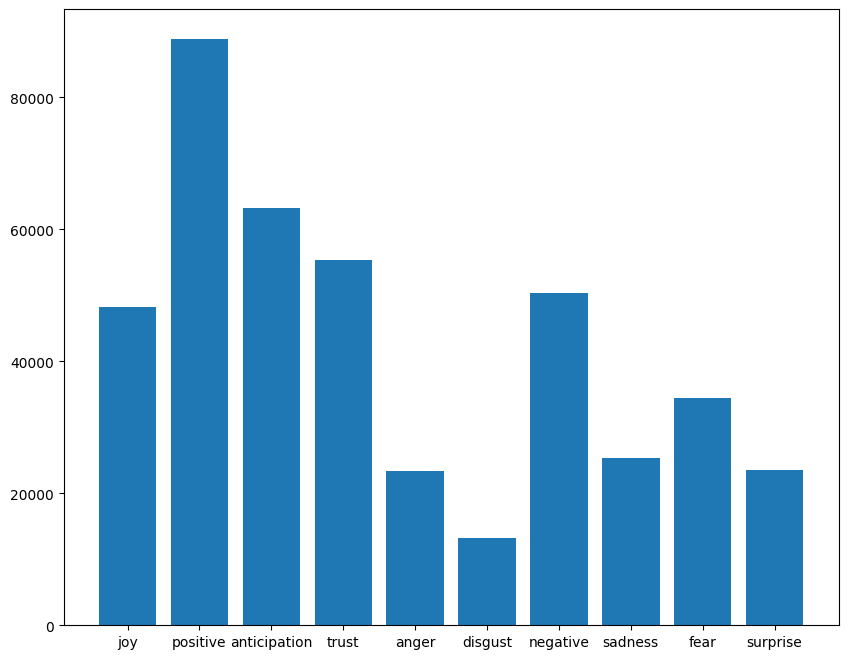

In [9]:
plot_emotion_count(tweets.emotions)

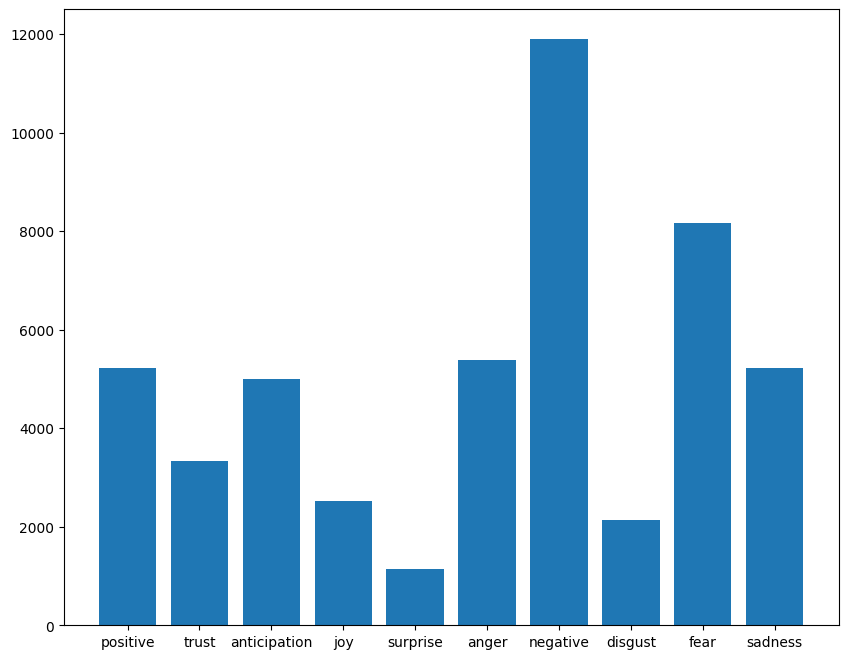

In [17]:
plot_emotion_count(tweets_neg.emotions)

In [10]:
hashtags_iran = ['mahsaamini', 'javanroud', 'iranrevolution', 'saytheirnames', 'opiran']
tweets_iran = tweets.loc[tweets.apply(lambda row : any(hashtag in row.hashtags_list for hashtag in hashtags_iran), axis=1)]

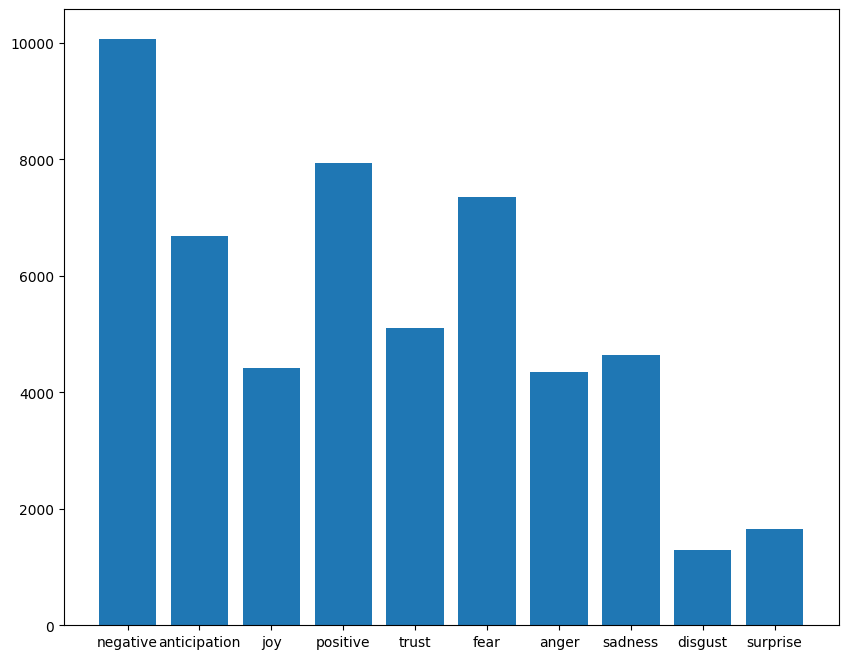

In [12]:
plot_emotion_count(tweets_iran.emotions)